# # Project: Investigate a Dataset - US Gun Permit Requests by State

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In the United States, individuals with the intent to legally purchase firearms and explosives must be determined eligible by a formal background check. The Federal Bureau of Investigations' (FBI) National Instant Criminal Background Check System (NICS) is the nationwide system gun sellers use to verify a potential buyer is eligle to purchase the explosives and/or firearm. U.S. Census data lists demographic information regarding state populations, including ethnicity, education, housing affordability, and commerce. This project analyzes the relationship between the United States state demographic information and the prevalence of gun purchase requests per state capita.  Data used for analysis was gathered from the NCIS and U.S. Census. For the purposes of this project, demographic information such as state population estimates, reported ethnicities per state, percentages of poverty and total employment per state, and educational levels reported by state were used to compare the prevalence of gun purchase requests per state capita. 

### Question(s) for Analysis
This project will first analyze the total population estimates per state to determine which states have the highest populations. Using this information, comparisons will be made to determine which states have the highest gun purchase requests per capita. Once the state with the highest gun purchase requests per capita is identified, this state's demographic information will be analyzed to determine the prevalence of gun purchase requests in relation to educational level, income, and ethnicity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I am checking to see each file loaded correctly, evaluating each dataset content, and taking note of any necessary changes I need to make. I am also evaluating which data is necessary for my project and which data can be removed so that I may condense the overall dataset.

In [2]:
#Reading in both original files:
#importing and loading data
gd = pd.read_excel('gun_data.xlsx')
usd = pd.read_csv('U.S. Census Data.csv')

In [3]:
#Exploring gun dataset
gd.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#exploring gun data types
gd.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [5]:
#Exploring gun data set rows/columns
gd.shape

(12485, 27)

In [6]:
#viewing US Census data file
usd.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
#Viewing usd rows/column quantity
usd.shape

(85, 52)

### Data Cleaning
Both datasets contain a lot of information that is in excess of what is needed for the current project. Therefore, certain rows and columns of data that is not pertinant to the current project will be removed. I will also change certain datatypes to allow for future analysis. After eliminating unnecessary data and transforming datatypes, I will prepare each dataset to merge into one dataset for final project analysis.

In [8]:
#Cleaning the gun dataset
#There are more columns of data than needed for my analysis. Removing unnecessary columns
gd1 = gd.copy()
gd1.drop(['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 
         'multiple', 'admin', 'prepawn_handgun', 'rentals_handgun', 
         'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 
         'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 
         'return_to_seller_other', 'prepawn_long_gun', 'prepawn_other', 
         'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 
         'returned_long_gun', 'returned_other'], axis=1, inplace=True)

In [9]:
#View new condensed dataset
gd1.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [10]:
#Changing the month column to datetime
gd1['date'] = pd.to_datetime(gd1['month'])
gd1['year'] = gd1['date'].dt.year
gd1['month_new'] = gd1['date'].dt.month
gd1.head()

,month,state,totals,date,year,month_new
0,2017-09,Alabama,32019,2017-09-01,2017,9
1,2017-09,Alaska,6303,2017-09-01,2017,9
2,2017-09,Arizona,28394,2017-09-01,2017,9
3,2017-09,Arkansas,17747,2017-09-01,2017,9
4,2017-09,California,123506,2017-09-01,2017,9


In [11]:
#Dropping original month column since new month/year columns with that data were created
gd1.drop(['month', 'date'], axis=1, inplace=True)
gd1.head()

,state,totals,year,month_new
0,Alabama,32019,2017,9
1,Alaska,6303,2017,9
2,Arizona,28394,2017,9
3,Arkansas,17747,2017,9
4,California,123506,2017,9


In [12]:
#For my current project, I'm only concerned with years 2015 and 2016. Removing rows unnecessary to this project
gd1.drop(gd1[gd1['year'] <= 2014].index, inplace=True)

In [13]:
#Verifying years less than/equal to 2014 have been removed
gd1.tail()

,state,totals,year,month_new
1810,Virginia,36685,2015,1
1811,Washington,38018,2015,1
1812,West Virginia,17624,2015,1
1813,Wisconsin,24587,2015,1
1814,Wyoming,4413,2015,1


In [14]:
#removing unnecessary rows of data for years greater than 2016
gd1.drop(gd1[gd1['year'] >= 2017].index, inplace=True)

In [15]:
#Verifying data for years greater than 2016 have been removed
gd1.head()

,state,totals,year,month_new
495,Alabama,62014,2016,12
496,Alaska,8786,2016,12
497,Arizona,44887,2016,12
498,Arkansas,29926,2016,12
499,California,298161,2016,12


In [16]:
#Gun permit amounts are divided by month. I want to sum gun permit totals by month to get a year sum.
gd2 = gd1.groupby(['state', 'year']).totals.sum().reset_index().copy()

In [17]:
gd2.head()

,state,year,totals
0,Alabama,2015,737509
1,Alabama,2016,616947
2,Alaska,2015,85621
3,Alaska,2016,87647
4,Arizona,2015,331442


In [18]:
gd2.dtypes

state     object
year       int64
totals     int64
dtype: object

In [19]:
#Cleaning the usd dataset
#Changing first line from number index to first row for better column names; getting rid of 'Fact Note' row
usd_new = usd.set_index('Fact').drop('Fact Note', axis=1).T.copy()
usd_new.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Viewing column names. 
usd_new.columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [21]:
#There are more columns of data than is needed for this project. Here I am isolating those columns I will need for analysis
columns_needed = ['Population estimates, July 1, 2016,  (V2016)', 'White alone, percent, July 1, 2016,  (V2016)',
                             'Black or African American alone, percent, July 1, 2016,  (V2016)',
                     'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
                                                 'Asian alone, percent, July 1, 2016,  (V2016)',
            'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
                                           'Two or More Races, percent, July 1, 2016,  (V2016)',
                                          'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
                         'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
                  'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
                     'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015',
                 'Persons in poverty, percent','Total employment, 2015']

In [22]:
#Creating dataset copy with those columns
usd_new1 = usd_new[columns_needed].copy()
usd_new1.head()

Fact,"Population estimates, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Persons in poverty, percent","Total employment, 2015"
Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,17.10%,"1,634,391"
Alaska,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,92.10%,28.00%,9.90%,"267,999"
Arizona,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,86.00%,27.50%,16.40%,"2,295,186"
Arkansas,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,84.80%,21.10%,17.20%,"1,003,113"
California,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,81.80%,31.40%,14.30%,"14,325,377"


In [23]:
#Renaming columns
usd_new1.columns = ['pop_est_2016', 'white', 'black', 'native_amer', 'asian', 'pac_island', 
           'mult_race', 'hispanic', 'non_his_white','hs_grad', 'college_grad', 'poverty', 'tot_employed_2015']



In [24]:
#Noting data is string with '%' characters, and some values are null with 'Z'
usd_new1.head(50)

,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,17.10%,"1,634,391"
Alaska,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,92.10%,28.00%,9.90%,"267,999"
Arizona,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,86.00%,27.50%,16.40%,"2,295,186"
Arkansas,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,84.80%,21.10%,17.20%,"1,003,113"
California,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,81.80%,31.40%,14.30%,"14,325,377"
Colorado,"5,540,545",87.50%,4.50%,1.60%,3.30%,0.20%,3.00%,21.30%,68.60%,90.70%,38.10%,11.00%,"2,253,795"
Connecticut,"3,576,452",80.60%,11.80%,0.50%,4.70%,0.10%,2.30%,15.70%,67.70%,89.90%,37.60%,9.80%,"1,503,102"
Delaware,"952,065",70.10%,22.60%,0.60%,4.00%,0.10%,2.60%,9.20%,62.90%,88.40%,30.00%,11.70%,"397,385"
Florida,"20,612,439",77.60%,16.80%,0.50%,2.90%,0.10%,2.10%,24.90%,54.90%,86.90%,27.30%,14.70%,"7,777,990"
Georgia,"10,310,371",61.20%,32.00%,0.50%,4.10%,0.10%,2.10%,9.40%,53.40%,85.40%,28.80%,16.00%,"3,692,490"


In [25]:
#Changing datatype from string to float for designated columns
for col in usd_new1.columns[0:13]:
    #Remove ',' for strings
    usd_new1[col] = usd_new1[col].str.replace(',', '')
    #True if the row DOES NOT contain a %, ~means Not
    mask = usd_new1[col].str.contains('%')
    if mask.any():
        #multiply portions by 100
        usd_new1.loc[mask, col] = usd_new1.loc[mask, col].str.replace('%', '').str.strip().astype(float).div(100)
    #all others extract number
    usd_new1[col] = usd_new1[col].apply(pd.to_numeric, errors='coerce').mul(100)

In [26]:
#Viewing new column values
for col in usd_new1.columns[0:13]:
    print(col, usd_new1[col].values)

pop_est_2016 [ 486330000   74189400  693107100  298824800 3925001700  554054500
  357645200   95206500 2061243900 1031037100  142855700  168314000
 1280153900  663305300  313469300  290728900  443697400  468166600
  133147900  601644700  681177900  992830000  551995200  298872600
  609300000  104252000  190711600  294005800  133479500  894446900
  208101500 1974528900 1014678800   75795200 1161437300  392356100
  409346500 1278422700  105642600  496111900   86545400  665119400
 2786259600  305121700   62459400  841180800  728800000  183110200
  577870800   58550100]
white [69.3 66.1 83.3 79.4 72.7 87.5 80.6 70.1 77.6 61.2 25.8 93.3 77.2 85.6
 91.4 86.6 88.  63.2 94.8 59.3 81.8 79.6 85.  59.3 83.2 89.2 88.9 75.1
 93.8 72.4 82.6 69.9 71.  87.9 82.5 74.6 87.4 82.4 84.4 68.5 85.2 78.7
 79.4 91.1 94.6 70.  80.  93.6 87.5 92.8]
black [26.8  3.8  4.9 15.7  6.5  4.5 11.8 22.6 16.8 32.   2.2  0.8 14.7  9.7
  3.7  6.2  8.3 32.6  1.5 30.7  8.6 14.2  6.2 37.7 11.8  0.6  5.   9.6
  1.5 15.   2.5 17

In [27]:
#Verifying change
usd_new1.head(50)

,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
Alabama,486330000,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100
Alaska,74189400,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900
Arizona,693107100,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600
Arkansas,298824800,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,100311300
California,3925001700,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1432537700
Colorado,554054500,87.5,4.5,1.6,3.3,0.2,3.0,21.3,68.6,90.7,38.1,11.0,225379500
Connecticut,357645200,80.6,11.8,0.5,4.7,0.1,2.3,15.7,67.7,89.9,37.6,9.8,150310200
Delaware,95206500,70.1,22.6,0.6,4.0,0.1,2.6,9.2,62.9,88.4,30.0,11.7,39738500
Florida,2061243900,77.6,16.8,0.5,2.9,0.1,2.1,24.9,54.9,86.9,27.3,14.7,777799000
Georgia,1031037100,61.2,32.0,0.5,4.1,0.1,2.1,9.4,53.4,85.4,28.8,16.0,369249000


In [28]:
#Rechecking datatypes to ensure command was successful
usd_new1.dtypes

pop_est_2016           int64
white                float64
black                float64
native_amer          float64
asian                float64
pac_island           float64
mult_race            float64
hispanic             float64
non_his_white        float64
hs_grad              float64
college_grad         float64
poverty              float64
tot_employed_2015      int64
dtype: object

In [29]:
#Checking dataset for null values
usd_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop_est_2016       50 non-null     int64  
 1   white              50 non-null     float64
 2   black              50 non-null     float64
 3   native_amer        50 non-null     float64
 4   asian              50 non-null     float64
 5   pac_island         46 non-null     float64
 6   mult_race          50 non-null     float64
 7   hispanic           50 non-null     float64
 8   non_his_white      50 non-null     float64
 9   hs_grad            50 non-null     float64
 10  college_grad       50 non-null     float64
 11  poverty            50 non-null     float64
 12  tot_employed_2015  50 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 5.5+ KB


In [30]:
#When viewing data, 'pac_island' appears to have null values. Overall, data within this column is less than 1%
#Will replace null values with mean for column
usd_new1.pac_island.fillna(usd_new1.pac_island.mean(), inplace=True)

In [31]:
#Verifying no more null values
usd_new1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop_est_2016       50 non-null     int64  
 1   white              50 non-null     float64
 2   black              50 non-null     float64
 3   native_amer        50 non-null     float64
 4   asian              50 non-null     float64
 5   pac_island         50 non-null     float64
 6   mult_race          50 non-null     float64
 7   hispanic           50 non-null     float64
 8   non_his_white      50 non-null     float64
 9   hs_grad            50 non-null     float64
 10  college_grad       50 non-null     float64
 11  poverty            50 non-null     float64
 12  tot_employed_2015  50 non-null     int64  
dtypes: float64(11), int64(2)
memory usage: 5.5+ KB


In [32]:
usd_new1.head()

,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
Alabama,486330000,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100
Alaska,74189400,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900
Arizona,693107100,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600
Arkansas,298824800,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,100311300
California,3925001700,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1432537700


In [33]:
#Need to make index a column for analysis
usd_new1.reset_index(inplace=True)
usd_new1.head()

,index,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
0,Alabama,486330000,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100
1,Alaska,74189400,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900
2,Arizona,693107100,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600
3,Arkansas,298824800,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,100311300
4,California,3925001700,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1432537700


In [34]:
#Renaming index to column name for later analysis
usd_new2 = usd_new1.rename(columns={'index': 'state'}).copy()
usd_new2.head()

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
0,Alabama,486330000,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100
1,Alaska,74189400,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900
2,Arizona,693107100,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600
3,Arkansas,298824800,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,100311300
4,California,3925001700,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1432537700


In [35]:
#Now both datasets have been cleaned and trimmed, I want to save both as is:
#This dataset is now ready to be merged with my next dataset. Saving to be used later.
gd2.to_csv('gun_data_v2.csv', index = False)
#This dataset is now ready to merge for project analysis.
usd_new2.to_csv('us_census_v1.csv', index=False)

In [36]:
#importing and reading both dataframes
#gun_data = pd.read_csv('gun_data_v1.csv')
us_census = pd.read_csv('us_census_v1.csv')
gd = pd.read_csv('gun_data_v2.csv')

In [37]:
#making sure dataset imported correctly
gd.head()

,state,year,totals
0,Alabama,2015,737509
1,Alabama,2016,616947
2,Alaska,2015,85621
3,Alaska,2016,87647
4,Arizona,2015,331442


In [38]:
#renaming columns before merging with other dataset
gd.rename(columns={'totals': 'gun_permit_total', 'year': 'gun_permit_year'}, inplace=True)
gd

,state,gun_permit_year,gun_permit_total
0,Alabama,2015,737509
1,Alabama,2016,616947
2,Alaska,2015,85621
3,Alaska,2016,87647
4,Arizona,2015,331442
...,...,...,...
105,West Virginia,2016,242350
106,Wisconsin,2015,383280
107,Wisconsin,2016,561819
108,Wyoming,2015,62339


In [39]:
#checking for datatypes
gd.dtypes

state               object
gun_permit_year      int64
gun_permit_total     int64
dtype: object

In [40]:
#making sure us census dataset imported correctly
us_census.head()

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015
0,Alabama,486330000,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100
1,Alaska,74189400,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900
2,Arizona,693107100,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600
3,Arkansas,298824800,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,100311300
4,California,3925001700,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1432537700


In [41]:
#verifying datatypes
us_census.dtypes

state                 object
pop_est_2016           int64
white                float64
black                float64
native_amer          float64
asian                float64
pac_island           float64
mult_race            float64
hispanic             float64
non_his_white        float64
hs_grad              float64
college_grad         float64
poverty              float64
tot_employed_2015      int64
dtype: object

In [42]:
#Combining both datasets for project analysis. I want to keep all columns between both datasets, so I will perform an outer join.
df = pd.merge(us_census, gd, on='state', how='outer')

In [43]:
#Affirming dataset merge was successful
df.head(20)

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total
0,Alabama,4.863300e+08,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,1.634391e+08,2015,737509
1,Alabama,4.863300e+08,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,1.634391e+08,2016,616947
2,Alaska,7.418940e+07,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,2.679990e+07,2015,85621
3,Alaska,7.418940e+07,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,2.679990e+07,2016,87647
4,Arizona,6.931071e+08,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,2.295186e+08,2015,331442
5,Arizona,6.931071e+08,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,2.295186e+08,2016,416279
6,Arkansas,2.988248e+08,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,1.003113e+08,2015,257346
7,Arkansas,2.988248e+08,79.4,15.7,1.0,1.6,0.3,2.0,7.3,72.9,84.8,21.1,17.2,1.003113e+08,2016,266014
8,California,3.925002e+09,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1.432538e+09,2015,1761079
9,California,3.925002e+09,72.7,6.5,1.7,14.8,0.5,3.8,38.9,37.7,81.8,31.4,14.3,1.432538e+09,2016,2377167


In [44]:
#Rechecking datatypes
df.dtypes

state                 object
pop_est_2016         float64
white                float64
black                float64
native_amer          float64
asian                float64
pac_island           float64
mult_race            float64
hispanic             float64
non_his_white        float64
hs_grad              float64
college_grad         float64
poverty              float64
tot_employed_2015    float64
gun_permit_year        int64
gun_permit_total       int64
dtype: object

In [45]:
df.shape

(110, 16)

In [46]:
df.describe()

,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,110.000000,1.100000e+02
mean,6.448927e+08,79.308000,11.024000,1.998000,4.342000,0.430435,2.944000,11.714000,69.320000,88.224000,29.012000,13.518000,2.471459e+08,2015.500000,4.586527e+05
std,7.234950e+08,12.273447,9.583099,3.049589,5.533811,1.425577,3.170709,10.273709,15.584154,3.073941,4.909057,3.004488,2.719754e+08,0.502288,6.115602e+05
min,5.855010e+07,25.800000,0.600000,0.200000,0.800000,0.100000,1.200000,1.500000,22.100000,81.800000,19.200000,7.300000,2.198810e+07,2015.000000,1.700000e+01
25%,1.831102e+08,72.400000,3.600000,0.500000,1.700000,0.100000,1.900000,5.000000,59.000000,85.600000,25.900000,11.300000,5.764240e+07,2015.000000,9.612500e+04
50%,4.559320e+08,82.100000,8.200000,0.750000,2.850000,0.100000,2.200000,9.200000,72.950000,88.850000,28.200000,13.300000,1.606934e+08,2015.500000,2.616800e+05
75%,7.288000e+08,87.500000,15.700000,1.600000,4.800000,0.300000,2.700000,13.800000,80.600000,90.900000,31.900000,15.400000,3.167329e+08,2016.000000,5.656642e+05
max,3.925002e+09,94.800000,37.700000,15.200000,37.700000,10.200000,23.700000,48.500000,93.500000,92.800000,40.500000,20.800000,1.432538e+09,2016.000000,3.676847e+06


In [47]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              110 non-null    object 
 1   pop_est_2016       100 non-null    float64
 2   white              100 non-null    float64
 3   black              100 non-null    float64
 4   native_amer        100 non-null    float64
 5   asian              100 non-null    float64
 6   pac_island         100 non-null    float64
 7   mult_race          100 non-null    float64
 8   hispanic           100 non-null    float64
 9   non_his_white      100 non-null    float64
 10  hs_grad            100 non-null    float64
 11  college_grad       100 non-null    float64
 12  poverty            100 non-null    float64
 13  tot_employed_2015  100 non-null    float64
 14  gun_permit_year    110 non-null    int64  
 15  gun_permit_total   110 non-null    int64  
dtypes: float64(13), int64(2), 

In [48]:
#10 missing/null values remain
df.isnull().sum()

state                 0
pop_est_2016         10
white                10
black                10
native_amer          10
asian                10
pac_island           10
mult_race            10
hispanic             10
non_his_white        10
hs_grad              10
college_grad         10
poverty              10
tot_employed_2015    10
gun_permit_year       0
gun_permit_total      0
dtype: int64

In [49]:
#I suspect the null values are due to limited ethnic data for smaller states. Looking for specific null data
df.tail(20)

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total
90,Virginia,841180800.0,70.0,19.8,0.5,6.6,0.100000,2.9,9.1,62.4,88.3,36.3,11.0,319871800.0,2015,462997
91,Virginia,841180800.0,70.0,19.8,0.5,6.6,0.100000,2.9,9.1,62.4,88.3,36.3,11.0,319871800.0,2016,528369
92,Washington,728800000.0,80.0,4.1,1.9,8.6,0.800000,4.6,12.4,69.5,90.4,32.9,11.3,260240800.0,2015,502280
93,Washington,728800000.0,80.0,4.1,1.9,8.6,0.800000,4.6,12.4,69.5,90.4,32.9,11.3,260240800.0,2016,713996
94,West Virginia,183110200.0,93.6,3.6,0.2,0.8,0.430435,1.7,1.5,92.3,85.0,19.2,17.9,56543500.0,2015,249014
95,West Virginia,183110200.0,93.6,3.6,0.2,0.8,0.430435,1.7,1.5,92.3,85.0,19.2,17.9,56543500.0,2016,242350
96,Wisconsin,577870800.0,87.5,6.6,1.1,2.8,0.100000,1.9,6.7,81.7,91.0,27.8,11.8,250353200.0,2015,383280
97,Wisconsin,577870800.0,87.5,6.6,1.1,2.8,0.100000,1.9,6.7,81.7,91.0,27.8,11.8,250353200.0,2016,561819
98,Wyoming,58550100.0,92.8,1.3,2.7,1.0,0.100000,2.1,10.0,84.1,92.3,25.7,11.3,21988100.0,2015,62339
99,Wyoming,58550100.0,92.8,1.3,2.7,1.0,0.100000,2.1,10.0,84.1,92.3,25.7,11.3,21988100.0,2016,63594


In [50]:
#These smaller states/territories were not included in the us census data. This project focuses on us states with larger populations, therefore, these states will be removed for the purposes of this analysis.
df.dropna(axis=0, inplace=True)

In [51]:
#Verifying no more null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              100 non-null    object 
 1   pop_est_2016       100 non-null    float64
 2   white              100 non-null    float64
 3   black              100 non-null    float64
 4   native_amer        100 non-null    float64
 5   asian              100 non-null    float64
 6   pac_island         100 non-null    float64
 7   mult_race          100 non-null    float64
 8   hispanic           100 non-null    float64
 9   non_his_white      100 non-null    float64
 10  hs_grad            100 non-null    float64
 11  college_grad       100 non-null    float64
 12  poverty            100 non-null    float64
 13  tot_employed_2015  100 non-null    float64
 14  gun_permit_year    100 non-null    int64  
 15  gun_permit_total   100 non-null    int64  
dtypes: float64(13), int64(2), o

In [52]:
#Verifying smaller states/territories removed from dataset
df.tail(20)

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total
80,South Dakota,8.654540e+07,85.2,2.0,9.0,1.5,0.100000,2.3,3.7,82.5,90.9,27.0,13.3,3.535400e+07,2015,100268
81,South Dakota,8.654540e+07,85.2,2.0,9.0,1.5,0.100000,2.3,3.7,82.5,90.9,27.0,13.3,3.535400e+07,2016,111921
82,Tennessee,6.651194e+08,78.7,17.1,0.4,1.8,0.100000,1.9,5.2,74.2,85.5,24.9,15.8,2.507205e+08,2015,654192
83,Tennessee,6.651194e+08,78.7,17.1,0.4,1.8,0.100000,1.9,5.2,74.2,85.5,24.9,15.8,2.507205e+08,2016,714774
84,Texas,2.786260e+09,79.4,12.6,1.0,4.8,0.100000,1.9,39.1,42.6,81.9,27.6,15.6,1.023971e+09,2015,1574266
85,Texas,2.786260e+09,79.4,12.6,1.0,4.8,0.100000,1.9,39.1,42.6,81.9,27.6,15.6,1.023971e+09,2016,1721726
86,Utah,3.051217e+08,91.1,1.4,1.6,2.5,1.000000,2.5,13.8,78.8,91.2,31.1,10.2,1.203954e+08,2015,254814
87,Utah,3.051217e+08,91.1,1.4,1.6,2.5,1.000000,2.5,13.8,78.8,91.2,31.1,10.2,1.203954e+08,2016,294907
88,Vermont,6.245940e+07,94.6,1.3,0.4,1.8,0.430435,1.9,1.9,93.1,91.8,36.0,11.9,2.663630e+07,2015,34588
89,Vermont,6.245940e+07,94.6,1.3,0.4,1.8,0.430435,1.9,1.9,93.1,91.8,36.0,11.9,2.663630e+07,2016,39417


In [53]:
#Before I begin statistical analyses, I need to identify and create other calculations I will use for this project
#To determine gun permit requests per state population, I need to calculate a new column. 
#Calculating a new column for gun permits per capita for each state
df['permits_per_capita'] = df['gun_permit_total'] / df['pop_est_2016']

In [54]:
#For later analysis, I need a new column to get percentage of total population employment in 2015
#instead of the total employed population
df['tot_percent_employ'] = (df['tot_employed_2015'] / df['pop_est_2016']) * 100

In [55]:
#Verifying successful completion and creation of new column
df.head()

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total,permits_per_capita,tot_percent_employ
0,Alabama,486330000.0,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100.0,2015,737509,0.001516,33.606625
1,Alabama,486330000.0,69.3,26.8,0.7,1.4,0.1,1.6,4.2,65.8,84.3,23.5,17.1,163439100.0,2016,616947,0.001269,33.606625
2,Alaska,74189400.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900.0,2015,85621,0.001154,36.123624
3,Alaska,74189400.0,66.1,3.8,15.2,6.3,1.3,7.3,7.0,61.2,92.1,28.0,9.9,26799900.0,2016,87647,0.001181,36.123624
4,Arizona,693107100.0,83.3,4.9,5.4,3.4,0.3,2.8,30.9,55.5,86.0,27.5,16.4,229518600.0,2015,331442,0.000478,33.114449


In [56]:
#rechecking datatypes 
df.dtypes

state                  object
pop_est_2016          float64
white                 float64
black                 float64
native_amer           float64
asian                 float64
pac_island            float64
mult_race             float64
hispanic              float64
non_his_white         float64
hs_grad               float64
college_grad          float64
poverty               float64
tot_employed_2015     float64
gun_permit_year         int64
gun_permit_total        int64
permits_per_capita    float64
tot_percent_employ    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

The NCIS Gun Data and US Census datasets were cleaned, trimmed, and merged to form a single dataset with data specific to this project's analyses. For the purposes of this project, population data from all US states will be analyzed to determine the states with the highest populations and the states with the highest gun permit background checks per state capita. Once identified, the state with the highest gun permit requests will be further analyzed regarding the prevalence of gun permit requests as it relates to ethnicity, educational level, and income.


### Research Question 1 (Which US States have the highest population?)

In [57]:
#Function to determine state population values by year.
def state_populations(int):
    yr = df[df['gun_permit_year'] == int]
    state_pop = yr.groupby('state')['pop_est_2016'].max().sort_values(ascending=False)
    return state_pop

In [58]:
#Finding the most populated states
state_populations(2016)

state
California        3.925002e+09
Texas             2.786260e+09
Florida           2.061244e+09
New York          1.974529e+09
Illinois          1.280154e+09
Pennsylvania      1.278423e+09
Ohio              1.161437e+09
Georgia           1.031037e+09
North Carolina    1.014679e+09
Michigan          9.928300e+08
New Jersey        8.944469e+08
Virginia          8.411808e+08
Washington        7.288000e+08
Arizona           6.931071e+08
Massachusetts     6.811779e+08
Tennessee         6.651194e+08
Indiana           6.633053e+08
Missouri          6.093000e+08
Maryland          6.016447e+08
Wisconsin         5.778708e+08
Colorado          5.540545e+08
Minnesota         5.519952e+08
South Carolina    4.961119e+08
Alabama           4.863300e+08
Louisiana         4.681666e+08
Kentucky          4.436974e+08
Oregon            4.093465e+08
Oklahoma          3.923561e+08
Connecticut       3.576452e+08
Iowa              3.134693e+08
Utah              3.051217e+08
Mississippi       2.988726e+08
Ar

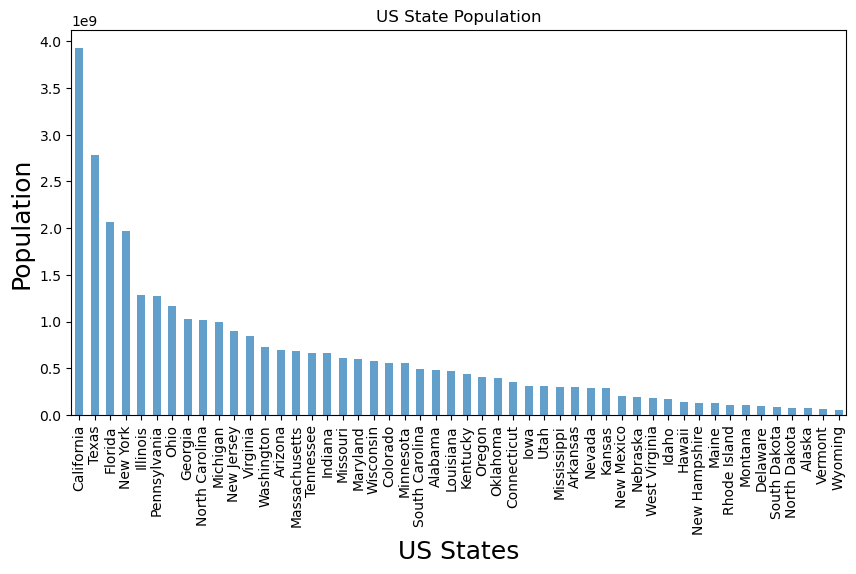

In [59]:
#Plotting US states by population
us_states = state_populations(2016)
us_states.plot(kind='bar', title='US State Population', alpha=.7, figsize=(10,5))
plt.xlabel('US States', fontsize=18)
plt.ylabel('Population', fontsize=18);

The above graph is a representation of US States with the highest populations. As depicted, the US state with the greatest amount of residents is California, followed by Texas, Florida, New York, and Illinois. 

### Research Question 2  (Which US State has the Highest Gun Permit Requests?)

In [60]:
#Function to find the states with the most gun purchase requests per capita
def find_top_gpstates(int):
    yr = df[df['gun_permit_year'] == int]
    yr_tot = yr.groupby('state')['permits_per_capita'].max().sort_values(ascending=False)
    return yr_tot

In [61]:
#Calling Function to find the state with highest gun purchase requests per capita
find_top_gpstates(2016)

state
Kentucky          0.008287
Indiana           0.002166
Illinois          0.001503
West Virginia     0.001324
Montana           0.001308
South Dakota      0.001293
Alabama           0.001269
New Hampshire     0.001237
Alaska            0.001181
Minnesota         0.001180
Wyoming           0.001086
Tennessee         0.001075
Missouri          0.001038
Washington        0.000980
Colorado          0.000976
Wisconsin         0.000972
Utah              0.000967
North Dakota      0.000950
Oklahoma          0.000929
Idaho             0.000929
Mississippi       0.000924
Pennsylvania      0.000894
Arkansas          0.000890
Connecticut       0.000888
Maine             0.000838
Louisiana         0.000837
South Carolina    0.000812
Oregon            0.000793
New Mexico        0.000775
Ohio              0.000754
Florida           0.000696
Kansas            0.000676
Iowa              0.000645
Vermont           0.000631
Virginia          0.000628
Delaware          0.000624
Texas             0.00

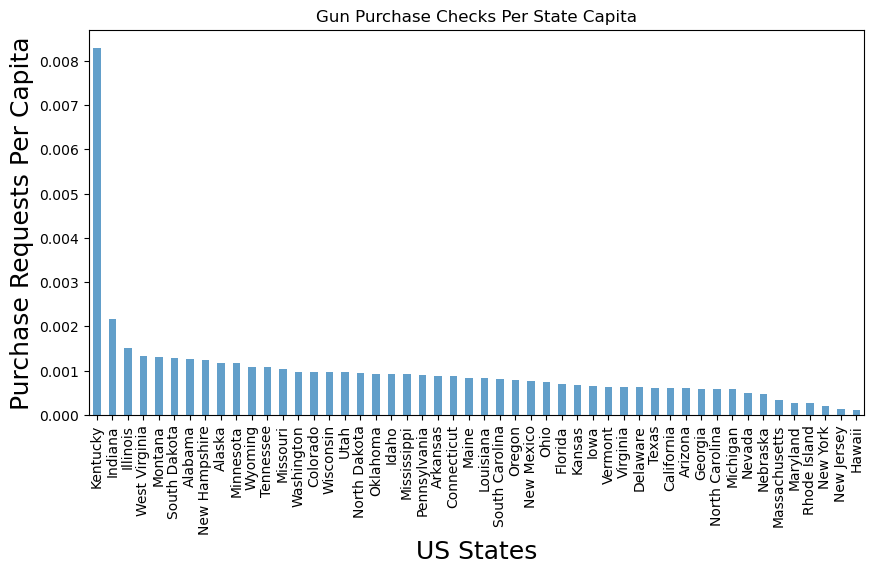

In [62]:
#Plotting the highest gun permits by capita per state
top_gpstates = find_top_gpstates(2016)
top_gpstates.plot(kind='bar', title='Gun Purchase Checks Per State Capita', alpha=.7, figsize=(10,5))
plt.xlabel('US States', fontsize=18)
plt.ylabel('Purchase Requests Per Capita', fontsize=18);

The above graph is a representation of US States with the highest gun purchase requests per capita. As depicted, the US state with the greatest amount of firearm/explosive purchase requests per state population is Kentucky, followed by Indiana, Illinois, West Virgina, and Montana.

 
Kentucky has been identified as the state with the most gun permit background checks per capita. The data provided is limited, however, in that there is no data specific to those individuals who applied for gun purchases. While the data does not allow for specific analysis of how Kentucky's state data may relate to its residents' gun purchasing behavior, data is present to evaluate Kentucky's demographic makeup.

### Research Question 3 (What is the reported population ethnicity of Kentucky?)

In [63]:
#Since Kentucky has significantly more gun permit background checks than any other state, 
#I want to analyze their state data a little more
kentuck = df.loc[df['state'] == 'Kentucky']
kentuck

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total,permits_per_capita,tot_percent_employ
32,Kentucky,443697400.0,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,84.2,22.3,18.5,157947700.0,2015,3218371,0.007254,35.598068
33,Kentucky,443697400.0,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,84.2,22.3,18.5,157947700.0,2016,3676847,0.008287,35.598068


In [64]:
#Isolating data for year 2016 for continued analysis
ky = kentuck[kentuck['gun_permit_year'] == 2016]
ky

,state,pop_est_2016,white,black,native_amer,asian,pac_island,mult_race,hispanic,non_his_white,hs_grad,college_grad,poverty,tot_employed_2015,gun_permit_year,gun_permit_total,permits_per_capita,tot_percent_employ
33,Kentucky,443697400.0,88.0,8.3,0.3,1.5,0.1,1.9,3.5,85.0,84.2,22.3,18.5,157947700.0,2016,3676847,0.008287,35.598068


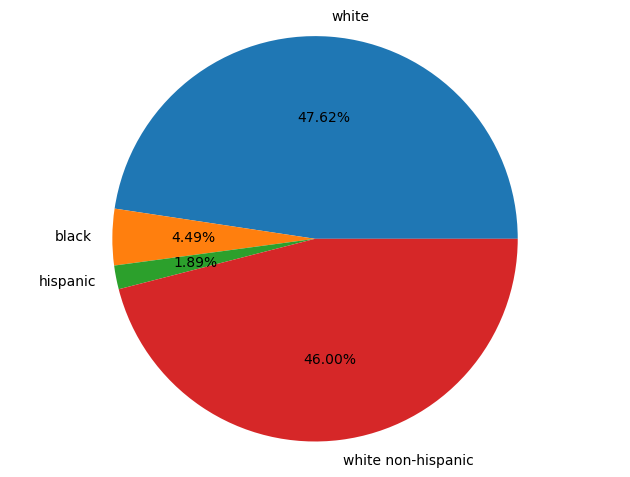

In [65]:
#Pie chart depicting Kentucky's ethnicity, with values less than 1% ethnic representation removed for visualization purposes

target_index = 33
fig, ax=plt.subplots()
values = df.iloc[target_index, np.r_[2:4, 8:10]]

ax.pie(values, labels=('white','black', 'hispanic','white non-hispanic'), autopct='%.2f%%', startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

Kentucky's ethnicity as reported by the US Census in 2016 was predominantly 'white' (47.62%) and 'white, non-hispanic' (46%). Kentucky residents identifying as African American or Hispanic/Latino were reported significantly less at 4.49% and 1.89%, respectively. Other ethnicities such as native american, asian, and pacific islander are not depicted in the above graph as those values were estimated at less than 1% of Kentucky's population in 2016.

Now that we have identified Kentucky's primary ethnicity, other demographic information, such as educational level, can be evaluated.
### Research Question 4 (What are the dominant Educational Levels for Kentucky residents?)

In [66]:
ky[['hs_grad', 'college_grad', 'pop_est_2016']]

,hs_grad,college_grad,pop_est_2016
33,84.2,22.3,443697400.0


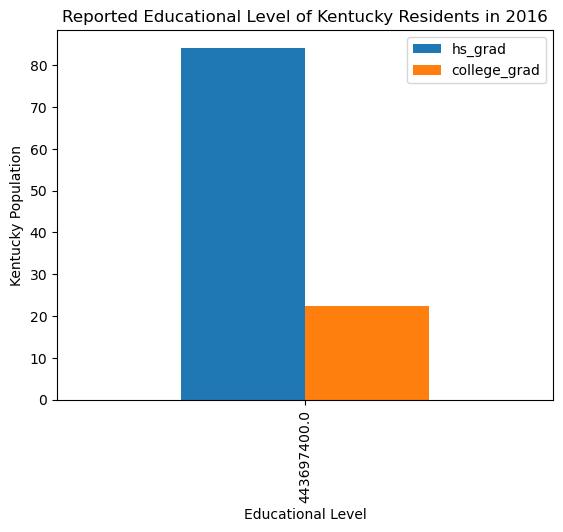

In [67]:
#Bar chart depicting education level for KY
ky.plot(x='pop_est_2016', y=['hs_grad', 'college_grad'], kind='bar')
plt.title('Reported Educational Level of Kentucky Residents in 2016')
plt.xlabel('Educational Level')
plt.ylabel('Kentucky Population');

Based on the above analysis, a higher percentage of Kentucky residents have a high school education than a college education. According to the US Census data, 84% of Kentucky residents have a high school degree compared to 22% of Kentucky residents with a college degree.


### Research Question 5 (How many Kentucky residents are Fully Employed and how many are considered living in Poverty?)

In [68]:
ky[['poverty', 'tot_percent_employ', 'pop_est_2016']]

,poverty,tot_percent_employ,pop_est_2016
33,18.5,35.598068,443697400.0


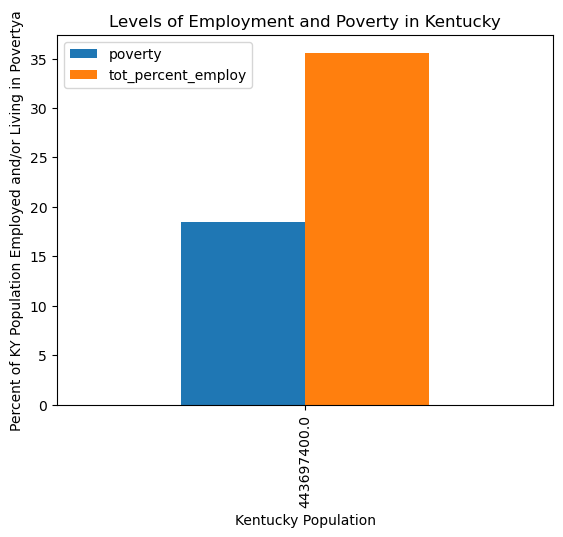

In [69]:
#Chart to depict gun purchase requests among those living in poverty and those employed. 
ky.plot(x='pop_est_2016', y=['poverty', 'tot_percent_employ'], kind='bar')
plt.title('Levels of Employment and Poverty in Kentucky')
plt.xlabel('Kentucky Population')
plt.ylabel('Percent of KY Population Employed and/or Living in Povertya');

The above graph is a representation of the percentage of Kentucky residents who were employed in 2015 and the percentage of Kentucky residents living in Poverty. According to the US Census, approximately 36% of Kentucky residents were employed in the year 2015, and approximately 19% of Kentucky residents were living in poverty. It should be noted the US Census data did not discriminate between individuals who were employed and also living in poverty. Therefore, these results should be interpreted with caution.

<a id='conclusions'></a>
## Conclusions

According to 2016 US Census population estimates, the five US states with the highest populations are: California, Texas, Florida, New York, and Illinois. When this information is compared to the NCIS Gun Background Checks data, the US states with the highest gun purchase requests per capita are: Kentucky, Indiana, Illinois, West Virginia, and Montana. Kentucky is only the 26th most populated state identified by this analysis, yet it contains the highest amount of gun purchase requests per capita when compared to any other state. Among census information provided for the state of Kentucky in 2016, Kentucky's ethnicity is characterized as predominantly 'white' and 'white, non-hispanic.' In 2016, 84% of Kentucky residents were reported to have a high school education compared to 22% of Kentucky residents with a college education. According to the US Census, approximately 36% of Kentucky residents were employed in the year 2015, and approximately 19% of Kentucky residents were living in poverty. It should be noted the US Census data did not discriminate between individuals who were employed and also living in poverty. Therefore, these results should be interpreted with caution.

### Limitation
US Census and NCIS data used for this analysis was from 2016. Further analysis with updated information may provide a better representation of current trends within the United States. While this analysis identified Kentucky as having the highest gun purchase requests per capita, it would be interesting to see how Kentucky's demographic profile compares to other states with high gun purchase requests. For example, Montana has the 5th highest gun purchase requests per capita but is only the 44th most populated state. It is also important to note that results from this analysis cannot be generalized to a greater population. Kentucky is a relatively small state, falling at the 26th state with the most population. Kentucky's ethinicity is not diverse and any correlations noted during this analysis cannot and should not by applied to the general US population. Similar limitations are present with any correlations among educational and income levels as they relate to gun purchases. The results of this analysis can only be applied to the state of Kentucky and utilized solely for demographic purposes. The results of this analysis cannot be applied to the general population, nor does this information indicate a causation among any of the described factors.
